# Author: Pragat Wagle 

### Machine Learning in Python Homework Assignment 2

### Exploratory Data Analysis (EDA)


# 1)

In [165]:
import pandas as pd

bikeDF = pd.read_csv("Electricity_Consumption-1.csv")
bikeDF.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620


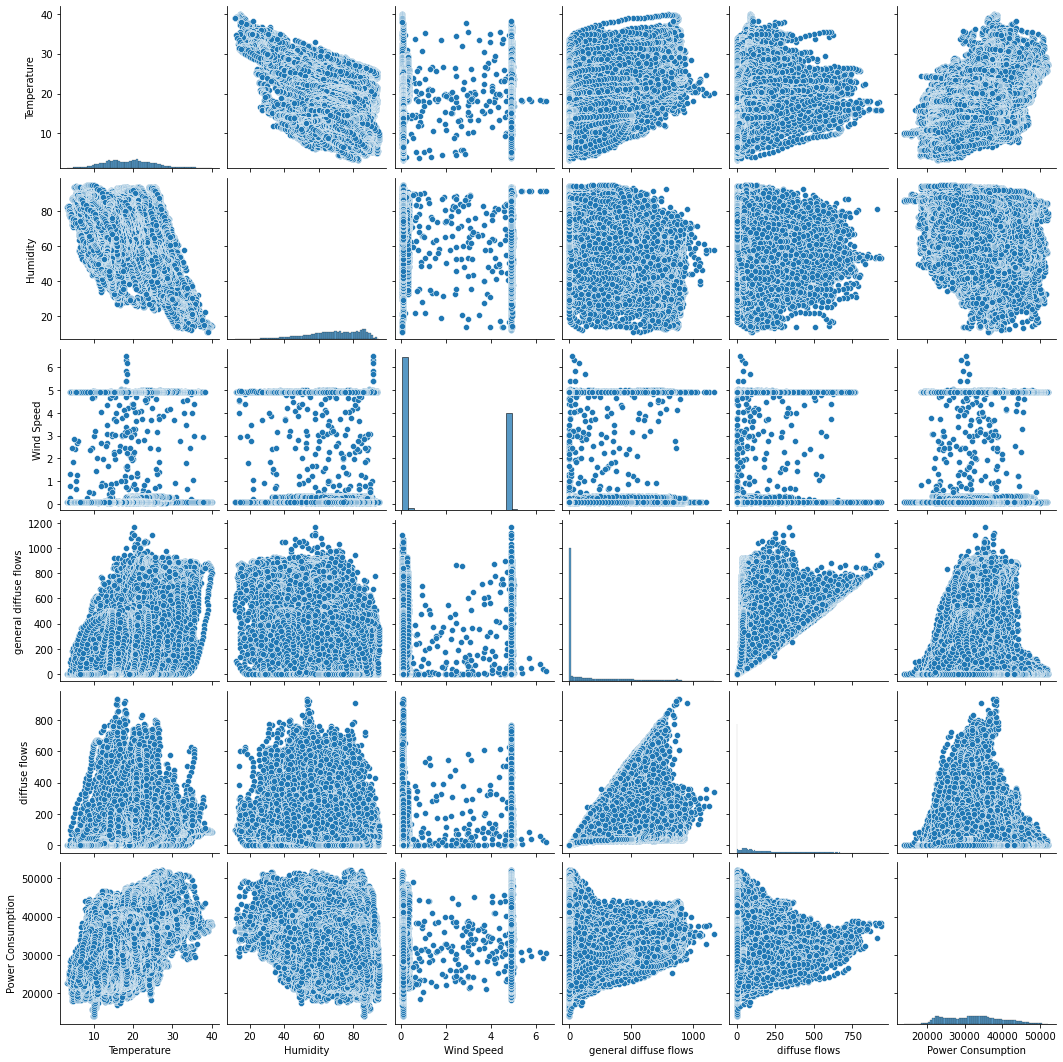

In [166]:
import seaborn as sns
sns.pairplot(bikeDF)

In [171]:
bikeDF.corr()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Power Consumption
Temperature,1.000000,-0.460243,0.477109,0.460294,0.196522,0.440221
Humidity,-0.460243,1.000000,-0.135853,-0.468138,-0.256886,-0.287421
Wind Speed,0.477109,-0.135853,1.000000,0.133733,-0.000972,0.167444
general diffuse flows,0.460294,-0.468138,0.133733,1.000000,0.564718,0.187965
diffuse flows,0.196522,-0.256886,-0.000972,0.564718,1.000000,0.080274
Power Consumption,0.440221,-0.287421,0.167444,0.187965,0.080274,1.000000


https://towardsdatascience.com/eveything-you-need-to-know-about-interpreting-correlations-2c485841c0b8

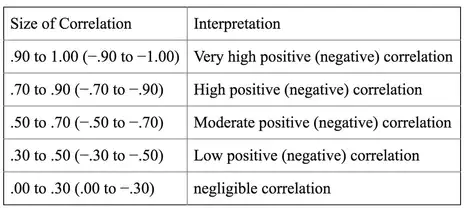

1) Temperature Correlations

   Temperature correlated between a range of 0.440221 and 0.477109 against features humidity, wind speed, general diffuse flows, and power consumption. which show a low correlation. Against diffuse flows it shows negligible correlation, with which it has .196 correlation. 
    
2) Humidity Correlations

    Humidity has a low negative correlation against temperature and general diffuse flows. Against all other they are neglibigle. 
    
3) Wind Speed Correlations

    Wind Speed has low correlation against temperature and against all other is negligible.
    
4) General Diffuse Flows Correlations

    General Diffuse had low correlation against temperature and a moderate correlation against diffuse flows and all others negligible.
    
5) Diffuse flows Correlations
    
    Diffuse flows has moderate correlation against general diffuse flows and neglible against all others.

6) Power Consumption

    Power Consumption has low postive correlation against temperature and neglible against all others.
    
Overall anything moderate can be considered to do further collinearity analysis but at this point, with only this much information available, would be to keep all columns. Had their been high correlations, these highly correlated features, all but one would have been considered to be dropped.

# 2)

The function below was used to create the visualizations and arguments consist of a feature with values, the actual values for power consumption at that value, and the predicted power consumption for that value. All of this data is from the Train Set, this is more so to visualize the predicted line against the given feature. 

In [238]:
def graphLinearPlotForFeature(feature, y, pred):
    plt.ylabel("Power Consumption")
    plt.plot(feature, y, label = "Temperature")
    plt.plot(feature, pred, color = "red")
    plt.legend()
    plt.show()

In [239]:
from sklearn.model_selection import train_test_split

x = bikeDF[["Temperature", "Humidity", "Wind Speed", "general diffuse flows", "diffuse flows"]]
y = bikeDF["Power Consumption"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [240]:
X_train

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows
37934,27.47,44.95,4.927,546.600,62.210
31917,32.55,41.38,4.904,623.700,284.900
28331,27.95,72.70,4.918,412.500,134.900
19788,22.92,55.79,4.916,660.800,653.600
23348,17.75,66.28,0.082,0.066,0.107
...,...,...,...,...,...
11284,10.48,89.90,0.082,42.590,39.970
44732,21.60,63.44,0.076,410.800,422.300
38158,22.98,50.05,4.922,0.088,0.100
860,12.37,76.40,0.085,0.055,0.119


In [241]:
y_train

37934    32546.54867
31917    40569.32297
28331    34381.39535
19788    33389.11475
23348    33784.37086
            ...     
11284    26079.31915
44732    30775.38462
38158    33094.51327
860      32002.02532
15795    25520.08611
Name: Power Consumption, Length: 35118, dtype: float64

In [242]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

modelSimple = LinearRegression(fit_intercept = True, normalize = True, n_jobs = -1)

Fit simple linear regresion using temperature 

In [243]:
x = X_train[["Temperature"]]
y = y_train

In [244]:
modelSimple.fit(x,y)
modelSimple.score(X_test[["Temperature"]], y_test)

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


0.19531212780108798

In [245]:
print("Weights/Coefficients: " + str(modelSimple.coef_))
print("Intercept: " + str(modelSimple.intercept_))

Weights/Coefficients: [540.87592577]
Intercept: 22147.454731936174


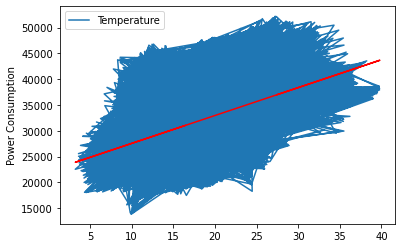

In [247]:
graphLinearPlotForFeature(X_train["Temperature"], y_train, modelSimple.predict(X_train[["Temperature"]]))

Fit simple linear regresion using humidity 

In [258]:
x = X_train[["Humidity"]]
y = y_train

In [259]:
modelSimple.fit(x,y)
modelSimple.score(X_test[["Humidity"]], y_test)

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


0.0866132282415053

In [260]:
print("Weights/Coefficients: " + str(modelSimple.coef_))
print("Intercept: " + str(modelSimple.intercept_))

Weights/Coefficients: [-129.82048223]
Intercept: 41185.86493178361


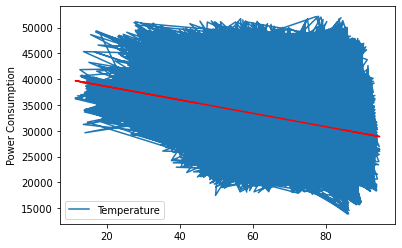

In [261]:
graphLinearPlotForFeature(X_train["Humidity"], y_train, modelSimple.predict(X_train[["Humidity"]]))

# 3)

#### Polynomial Regression with Degree of 4

In [136]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 4)
x_poly = poly.fit_transform(X_train)
model = LinearRegression(fit_intercept = True, normalize = True, n_jobs = -1)
model.fit(x_poly, y_train)

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(n_jobs=-1, normalize=True)

Accuracy Score

In [138]:
x_poly_test = poly.fit_transform(X_test)
model.score(x_poly_test,y_test)

0.29096106337827843

#### Polynomial Regression with Degree of 3

In [270]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)
x_poly = poly.fit_transform(X_train)
model = LinearRegression(fit_intercept = True, normalize = True, n_jobs = -1)
model.fit(x_poly, y_train)

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(n_jobs=-1, normalize=True)

Accuracy Score

In [271]:
x_poly_test = poly.fit_transform(X_test)
model.score(x_poly_test,y_test)

0.27693099990516745

#### Polynomial Regression with Degree of 5

In [272]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5)
x_poly = poly.fit_transform(X_train)
model = LinearRegression(fit_intercept = True, normalize = True, n_jobs = -1)
model.fit(x_poly, y_train)

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(n_jobs=-1, normalize=True)

Accuracy Score

In [273]:
x_poly_test = poly.fit_transform(X_test)
model.score(x_poly_test,y_test)

0.2899972354945435

Result Weights/Coefficient and Intercept 

In [139]:
print("Weights/Coefficients: " + str(model.coef_))
print("Intercept: " + str(model.intercept_))

Weights/Coefficients: [ 8.07016970e-07  1.01101533e+04  9.76476029e+02  8.00374415e+04
 -3.56233840e+02 -6.73229878e+01 -5.55549992e+02 -8.98413132e+01
 -8.11718367e+02  1.28847222e+01  1.42211035e+01 -2.67828251e+01
 -2.73019842e+03  9.53278145e+00  4.90930176e+00 -6.59665804e+03
 -3.74773497e+01 -1.90421295e+02  4.05383036e-01 -8.38486384e-01
  3.27323110e-01  1.04485951e+01  2.35154413e+00  6.42436476e+01
 -3.56530964e-02 -3.01408010e-01  5.72192876e-01  3.39996647e+01
 -3.75492201e-01 -1.47764429e-01 -6.82269638e+02  1.30193183e-01
  3.80289159e-01 -5.57907660e-03  2.16018833e-02 -2.88398684e-02
  3.99039931e-01  1.68673959e+01 -9.37913709e-02 -6.94115281e-02
  6.19171257e+02  8.01388152e-01  1.55671218e+00 -2.29630034e-04
  5.73288964e-03 -5.13880760e-03 -3.13888579e+03  9.00382276e+00
  4.94349748e+01 -2.02963849e-03  8.71349543e-02  3.30481082e-02
 -4.81475828e-04  5.84443523e-04  1.58920347e-04  9.38486505e-05
 -4.54121654e-02  1.89310695e-03 -8.53297397e-01 -4.31166447e-03
  6

Visualization PolyRegression Scatterplots

In [148]:
y_train_pred = model.predict(x_poly)

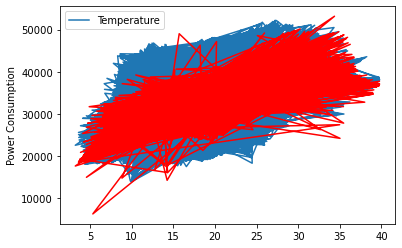

In [149]:
graphLinearPlotForFeature(X_train["Temperature"], y_train, y_train_pred)

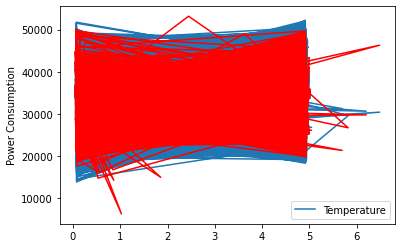

In [150]:
graphLinearPlotForFeature(X_train["Wind Speed"], y_train,y_train_pred)

graphLinearPlotForFeature(X_train["Humidity"], y_train,y_train_pred)

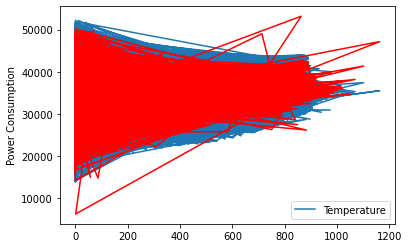

In [152]:
graphLinearPlotForFeature(X_train["general diffuse flows"], y_train,y_train_pred)

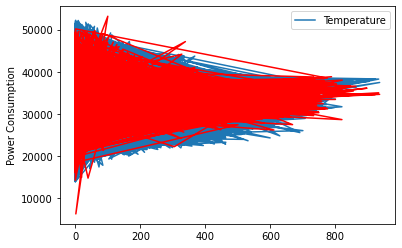

In [153]:
graphLinearPlotForFeature(X_train["diffuse flows"], y_train,y_train_pred)

From the visualizations above after polynomial transfomrations it can be seen that the predictions are better fitting the data and predictions are within a higher range that normal linear regression.

# 4)

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = bikeDF[["Temperature", "Humidity", "Wind Speed", "general diffuse flows", "diffuse flows"]]
y = bikeDF["Power Consumption"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

model = LinearRegression(fit_intercept = True, normalize = True, n_jobs = -1)

model.fit(X_train,y_train)

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(n_jobs=-1, normalize=True)

Result Weights/Coefficient and Intercept

In [83]:
print("Weights/Coefficients: " + str(model.coef_))
print("Intercept: " + str(model.intercept_))

Weights/Coefficients: [ 5.36127442e+02 -5.42539806e+01 -1.45352296e+02 -1.59392882e+00
 -2.06398844e-01]
Intercept: 26530.859673920593


Accuracy Score on Test Data Set

In [84]:
model.score(X_test, y_test)

0.21067322584656978

Visualizations

Scatterplots


In [101]:
y_train_pred = model.predict(X_train)

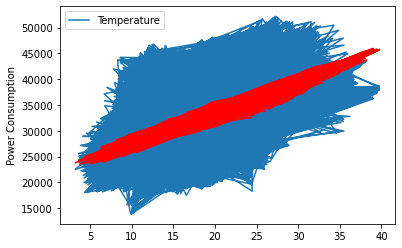

In [129]:
graphLinearPlotForFeature(X_train["Temperature"], y_train,y_train_pred)

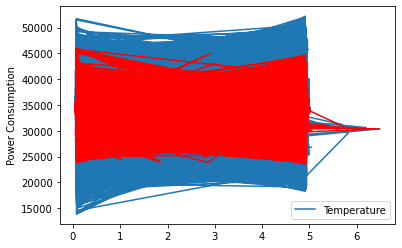

In [130]:
graphLinearPlotForFeature(X_train["Wind Speed"], y_train,y_train_pred)

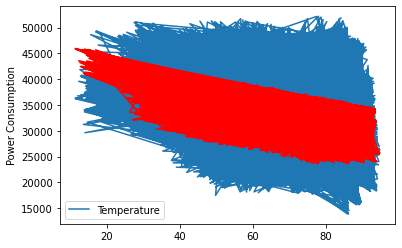

In [131]:
graphLinearPlotForFeature(X_train["Humidity"], y_train,y_train_pred)

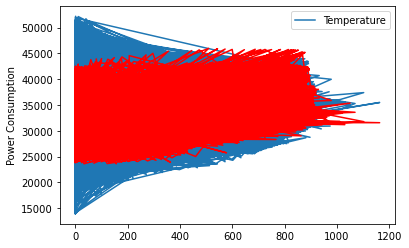

In [132]:
graphLinearPlotForFeature(X_train["general diffuse flows"], y_train,y_train_pred)

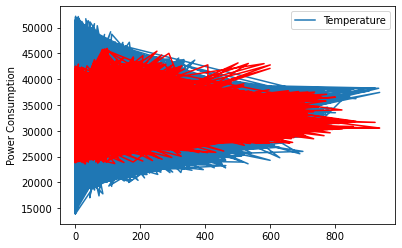

In [133]:
graphLinearPlotForFeature(X_train["diffuse flows"], y_train,y_train_pred)

From the visualizations above and correlations it can be seen that the Temperature and Humidity show some correlation and direction against power consumption. Using just those two variables may help improve predictive ability as they have stronger correlation.

# 5)

Results of Simple Linear Regression

    Temperature : 0.19531212780108798

    Humidity: 0.0866132282415053

Results of Polynomial Linear Regression

    Degree 3: 0.27693099990516745
    Degree 4: 0.29096106337827843
    Degree 5: 0.2899972354945435

Results of Mutiple Linear Regression

    All Features : 0.21067322584656978
    

Above are the results of the different approaches. Polynomial Regression, which is when the relationship between a independent and dependent variable is calculated using a nth degree polynomial to fit a non-linear relationship between the x and y performed the best. Up to a degree of 4 performed the best. When using simple linear regression against an individual feature temperature the predicitive accuracy score on the test set was 0.195 and with humidity 0.0866. Temperature had the highest correlation against power consumption and could be hypothesized based off that fact that it would perform the best when using a simple regression model. Multiple Linear Regression against all features returned an accuracy of 0.2107 which was better than the simple linear regression but worse than the polynomial regression. This means that there was a non linear strucuture that fit the data more so than a linear structure. Most likely the polynomial regression is overfitting the data and thus testing accuracy is higher on the held out test set but that would need to tested in the real world against another dataset. 
